In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from scipy import signal

In [2]:
train='train.csv'
df=pd.read_csv(train,index_col=0)
df.head()

,CHR,MAPINFO,UCSC_CpG_Islands_Name,UCSC_RefGene_Group,Relation_to_UCSC_CpG_Island,Regulatory_Feature_Group,Forward_Sequence,seq,Beta
Id,,,,,,,,,
cg00001583,1,200011786,chr1:200011400-200012055,Body;Body,Island,NaN,CGCCGTTGGGTAGCAGGAGGTAGAGCCTAGGCGAGAGCCTGGTGCG...,GCGCTTCTTTGCCCCGATGAGTTCGCCTCCCCAAACGCCTACTTCG...,0
cg00002719,1,169396706,chr1:169396621-169396869,TSS200,Island,NaN,GGACCACACTGCCATGGCAACAGCGTGCCTCTGCGTCCTCCATCCG...,AGTAAGAGACGGAAATAAATTCCTTCCTCCCTGAGTGTCTGGTAAA...,0
cg00003202,1,151319512,chr1:151319326-151319545,5'UTR;5'UTR,Island,Promoter_Associated,TGCAAAGTGGAGCGGGGGTGGGGCGGGGTAGCGGAACTCATGCGCT...,AAAGGACTGAAATGCCCAGCAGGTGCTCAAGAATTGCTACCATGGC...,0
cg00007036,1,33742089,chr1:33741774-33742381,Body,Island,NaN,GTCGGCCTCGTCGCAGCAGCCGTTGCTAGTGCCGCCGGCACCCGCC...,TTCTTGAAGATAACTTTCCAGAAGTACAATTTCTTGAGTCAAAGGG...,1
cg00007898,1,205180627,chr1:205179963-205180910,1stExon;1stExon,Island,Promoter_Associated,GGCCGAAGCCCCGGCACAGCTCGCGGATCATTCCGCCGCCGCCGGG...,AAAGGAAGCAAGACGTTAGGAAAGATTAAAGACTGCACGATTTTAA...,0


In [3]:
df['Regulatory_Feature_Group'].value_counts()

Regulatory_Feature_Group
Promoter_Associated                       11797
Unclassified                               2084
Unclassified_Cell_type_specific            1770
Promoter_Associated_Cell_type_specific      457
NonGene_Associated                          189
Gene_Associated_Cell_type_specific           80
Gene_Associated                              37
NonGene_Associated_Cell_type_specific         7
Name: count, dtype: int64

In [4]:
df['Relation_to_UCSC_CpG_Island'].value_counts()

Relation_to_UCSC_CpG_Island
Island     18269
N_Shore     2378
S_Shore     2107
N_Shelf      529
S_Shelf      434
Name: count, dtype: int64

In [5]:
m=500
df['CG']=df.seq.apply(lambda x:x[1000-m:1000+m].count('CG'))
df['TG']=df.seq.apply(lambda x:x[1000-m:1000+m].count('TG'))
df['CA']=df.seq.apply(lambda x:x[1000-m:1000+m].count('CA'))
df=pd.get_dummies(df,columns=['Regulatory_Feature_Group'])
df.head()

,CHR,MAPINFO,UCSC_CpG_Islands_Name,UCSC_RefGene_Group,Relation_to_UCSC_CpG_Island,Forward_Sequence,seq,Beta,CG,TG,CA,Regulatory_Feature_Group_Gene_Associated,Regulatory_Feature_Group_Gene_Associated_Cell_type_specific,Regulatory_Feature_Group_NonGene_Associated,Regulatory_Feature_Group_NonGene_Associated_Cell_type_specific,Regulatory_Feature_Group_Promoter_Associated,Regulatory_Feature_Group_Promoter_Associated_Cell_type_specific,Regulatory_Feature_Group_Unclassified,Regulatory_Feature_Group_Unclassified_Cell_type_specific
Id,,,,,,,,,,,,,,,,,,,
cg00001583,1,200011786,chr1:200011400-200012055,Body;Body,Island,CGCCGTTGGGTAGCAGGAGGTAGAGCCTAGGCGAGAGCCTGGTGCG...,GCGCTTCTTTGCCCCGATGAGTTCGCCTCCCCAAACGCCTACTTCG...,0,64,68,44,False,False,False,False,False,False,False,False
cg00002719,1,169396706,chr1:169396621-169396869,TSS200,Island,GGACCACACTGCCATGGCAACAGCGTGCCTCTGCGTCCTCCATCCG...,AGTAAGAGACGGAAATAAATTCCTTCCTCCCTGAGTGTCTGGTAAA...,0,33,46,66,False,False,False,False,False,False,False,False
cg00003202,1,151319512,chr1:151319326-151319545,5'UTR;5'UTR,Island,TGCAAAGTGGAGCGGGGGTGGGGCGGGGTAGCGGAACTCATGCGCT...,AAAGGACTGAAATGCCCAGCAGGTGCTCAAGAATTGCTACCATGGC...,0,38,56,69,False,False,False,False,True,False,False,False
cg00007036,1,33742089,chr1:33741774-33742381,Body,Island,GTCGGCCTCGTCGCAGCAGCCGTTGCTAGTGCCGCCGGCACCCGCC...,TTCTTGAAGATAACTTTCCAGAAGTACAATTTCTTGAGTCAAAGGG...,1,66,58,68,False,False,False,False,False,False,False,False
cg00007898,1,205180627,chr1:205179963-205180910,1stExon;1stExon,Island,GGCCGAAGCCCCGGCACAGCTCGCGGATCATTCCGCCGCCGCCGGG...,AAAGGAAGCAAGACGTTAGGAAAGATTAAAGACTGCACGATTTTAA...,0,85,55,46,False,False,False,False,True,False,False,False


In [6]:
X=df[['CG','Beta','TG','CA','Regulatory_Feature_Group_Promoter_Associated']]
X['mutation']=(X.TG+X.CA)/(2*X.CG)
y=X.Beta
X=X[['mutation','Regulatory_Feature_Group_Promoter_Associated']]
clf = LogisticRegression(random_state=0).fit(X, y)
y=y.values
prob=clf.predict_proba(X)
print('AUC: '+str(roc_auc_score(y,prob[:,1])))
pred=clf.predict(X)
print(classification_report(y, pred))

AUC: 0.9578166453065668
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     20243
           1       0.88      0.79      0.83      8822

    accuracy                           0.90     29065
   macro avg       0.90      0.87      0.88     29065
weighted avg       0.90      0.90      0.90     29065



/var/folders/rj/2g4tzz5n5ldbvpk48s_rqjh40000gn/T/ipykernel_98357/1411510467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mutation']=(X.TG+X.CA)/(2*X.CG)
/Users/ayushmangalgi/Ayush/Codee/Dying/EL/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/ayushmangalgi/Ayush/Codee/Dying/EL/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/ayushmangalgi/Ayush/Codee/Dying/EL/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
 

In [7]:
from sklearn.ensemble import RandomForestClassifier
X1=df[['CG','Beta','TG','CA','Regulatory_Feature_Group_Promoter_Associated']]
X1['mutation']=(X1.TG+X1.CA)/(2*X1.CG)
y1=X1.Beta
X1=X1[['mutation','Regulatory_Feature_Group_Promoter_Associated']]
clf1 = RandomForestClassifier(max_depth=2, random_state=0).fit(X1, y1)
y1=y1.values
prob1=clf1.predict_proba(X1)
print('AUC: '+str(roc_auc_score(y1,prob1[:,1])))
pred1=clf1.predict(X1)
print(classification_report(y1, pred1))

/var/folders/rj/2g4tzz5n5ldbvpk48s_rqjh40000gn/T/ipykernel_98357/1810021109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['mutation']=(X1.TG+X1.CA)/(2*X1.CG)


AUC: 0.9605977158749934
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     20243
           1       0.86      0.88      0.87      8822

    accuracy                           0.92     29065
   macro avg       0.90      0.91      0.91     29065
weighted avg       0.92      0.92      0.92     29065



In [8]:
from sklearn.ensemble import GradientBoostingClassifier
X2=df[['CG','Beta','TG','CA','Regulatory_Feature_Group_Promoter_Associated']]
X2['mutation']=(X2.TG+X2.CA)/(2*X2.CG)
y2=X2.Beta
X2=X2[['mutation','Regulatory_Feature_Group_Promoter_Associated']]
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X2, y2)
y2=y2.values
prob2=clf2.predict_proba(X2)
print('AUC: '+str(roc_auc_score(y2,prob[:,1])))
pred2=clf2.predict(X2)
print(classification_report(y2, pred2))

/var/folders/rj/2g4tzz5n5ldbvpk48s_rqjh40000gn/T/ipykernel_98357/1251543718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['mutation']=(X2.TG+X2.CA)/(2*X2.CG)


AUC: 0.9578166453065668
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     20243
           1       0.86      0.89      0.88      8822

    accuracy                           0.92     29065
   macro avg       0.91      0.91      0.91     29065
weighted avg       0.92      0.92      0.92     29065



In [9]:
from sklearn.neighbors import KNeighborsClassifier
X3=df[['CG','Beta','TG','CA','Regulatory_Feature_Group_Promoter_Associated']]
X3['mutation']=(X3.TG+X3.CA)/(2*X3.CG)
y3=X3.Beta
X3=X3[['mutation','Regulatory_Feature_Group_Promoter_Associated']]
clf3 = KNeighborsClassifier(n_neighbors=3).fit(X3, y3)
y3=y3.values
prob3=clf3.predict_proba(X3)
print('AUC: '+str(roc_auc_score(y3,prob3[:,1])))
pred3=clf3.predict(X3)
print(classification_report(y3, pred3))

AUC: 0.9766984644839961


/var/folders/rj/2g4tzz5n5ldbvpk48s_rqjh40000gn/T/ipykernel_98357/1008461179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3['mutation']=(X3.TG+X3.CA)/(2*X3.CG)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     20243
           1       0.90      0.90      0.90      8822

    accuracy                           0.94     29065
   macro avg       0.93      0.93      0.93     29065
weighted avg       0.94      0.94      0.94     29065



/Users/ayushmangalgi/Ayush/Codee/Dying/EL/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ayushmangalgi/Ayush/Codee/Dying/EL/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ayushmangalgi/Ayush/Codee/Dying/EL/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


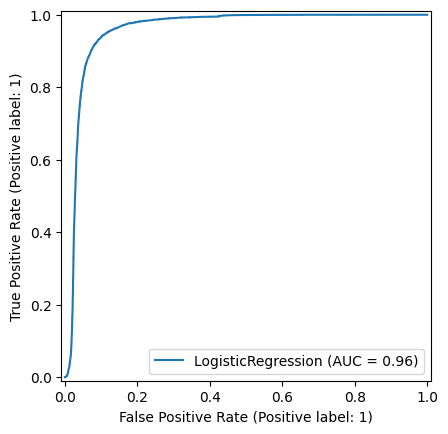

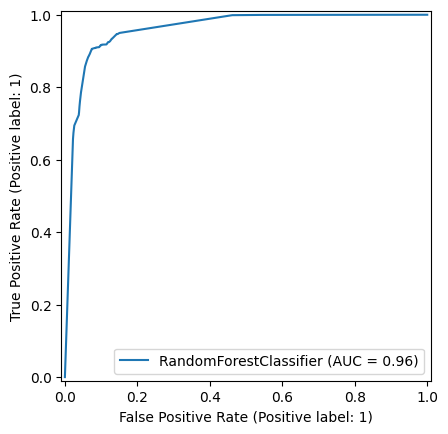

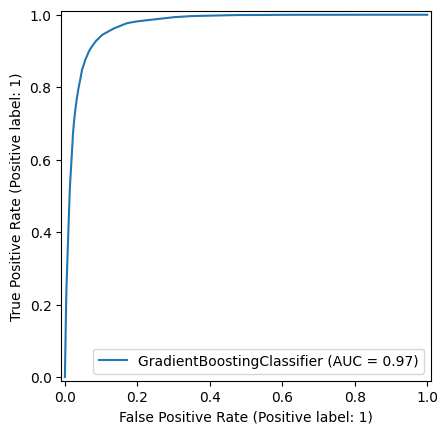

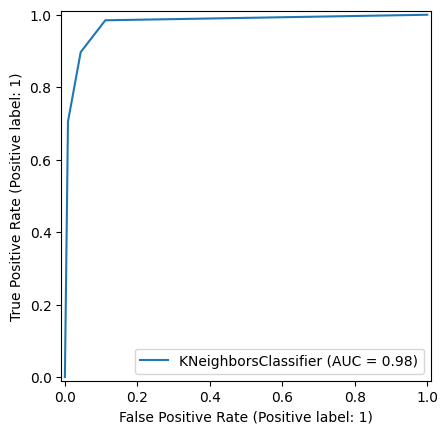

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X, y)
plt.show()

RocCurveDisplay.from_estimator(clf1, X1, y1)
plt.show()

RocCurveDisplay.from_estimator(clf2, X2, y2)
plt.show()

RocCurveDisplay.from_estimator(clf3, X3, y3)
plt.show()


In [13]:
test='test.csv'
df=pd.read_csv(test,index_col=0)
df['CG']=df.seq.apply(lambda x:x[500:1500].count('CG'))
df['TG']=df.seq.apply(lambda x:x[500:1500].count('TG'))
df['CA']=df.seq.apply(lambda x:x[500:1500].count('CA'))
df['mutation']=(df.TG+df.CA)/(2*df.CG)
df=pd.get_dummies(df,columns=['Regulatory_Feature_Group'])
X=df[['mutation','Regulatory_Feature_Group_Promoter_Associated']]
pred=clf.predict(X)

/Users/ayushmangalgi/Ayush/Codee/Dying/EL/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ayushmangalgi/Ayush/Codee/Dying/EL/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ayushmangalgi/Ayush/Codee/Dying/EL/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [14]:
df['Beta']=pred
df[['Beta']].to_csv('solution.csv')
df.head(1)

,CHR,MAPINFO,UCSC_CpG_Islands_Name,UCSC_RefGene_Group,Relation_to_UCSC_CpG_Island,Forward_Sequence,seq,CG,TG,CA,mutation,Regulatory_Feature_Group_Gene_Associated,Regulatory_Feature_Group_Gene_Associated_Cell_type_specific,Regulatory_Feature_Group_NonGene_Associated,Regulatory_Feature_Group_NonGene_Associated_Cell_type_specific,Regulatory_Feature_Group_Promoter_Associated,Regulatory_Feature_Group_Promoter_Associated_Cell_type_specific,Regulatory_Feature_Group_Unclassified,Regulatory_Feature_Group_Unclassified_Cell_type_specific,Beta
Id,,,,,,,,,,,,,,,,,,,,
cg00007981,11,93862594,chr11:93861560-93862773,1stExon,Island,AGCCCACGGAGCCCAAGTTCAAGGGGCTGCGACTGGAGCTGGCTGT...,CACACTCACTACCGTTTCCGCGCCACCCTCTCACGCGGAGCTCCTG...,86,74,51,0.726744,False,False,False,False,False,False,False,False,0


In [ ]:
import joblib

# Replace `model` with your trained model object
joblib.dump(clf, 'logistic_regression_model.pkl')
joblib.dump(clf1, 'decision_tree_model.pkl')
joblib.dump(clf2, 'random_forest_model.pkl')
joblib.dump(clf3, 'kneighbours_model.pkl')


['methylation_model3.pkl']